In [2]:
#visualizing protostellar disks from 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from astropy import units as u
from astropy.coordinates import SkyCoord

circumstellar_disks = pd.read_csv("data/circumstellardisks.csv")
data = pd.DataFrame(circumstellar_disks)
print(data )

                     Object Category Spec_Type R_band_mag  Distance_pc  \
0    2MASSI J1628137-243139       TT       NaN       17.7       140.00   
1                    49 Cet   Debris        A1        5.6        59.00   
2                    61 Vir   Debris       G7V        4.2         8.50   
3                    99 Her   Debris     F7+K4        4.7        15.60   
4      [MR81] H alpha 17 NE       TT       M2e       16.9       150.00   
5                    AA Tau       TT        M0       11.8       140.00   
6                    AB Aur      HAe       A0e        7.1       144.00   
7                 alpha CrB   Debris      A0 V        2.2        23.00   
8                  AS 205 A       TT        K0       12.8       128.00   
9                  AS 205 B       TT     K7+M0         14       128.00   
10                   AS 209       TT        K5       10.4       121.00   
11                   ASR 41       TT       NaN        NaN       316.00   
12                   AU Mic   Debris  

In [3]:
print("Total number of protostellar disk objects: " + str(len(data)))

Total number of protostellar disk objects: 253


In [4]:
prot_disk_cat = data.Category.unique() #unique types of protostellar disks
print("Unique Protostellar Disk Category: " + str(prot_disk_cat) + "\n")
print("Counts of Unique Categories:")
print(data['Category'].value_counts())
#Count Missing Values
missing_cat = 0
for index, row in data.iterrows():
    category_str = row['Category']
    if (isinstance(category_str, float)):
        missing_cat += 1
        #print(str(row['Object']) + " " + str(category_str) + " " + "Spectral Class Data missing")
print("Number of missing Categories: " + str(missing_cat))
#Make it properly

Unique Protostellar Disk Category: ['TT' 'Debris' 'HAe' 'YSO?' 'YSO' 'Trans' 'HBe' nan 'PPN' 'UC' 'wTT']

Counts of Unique Categories:
Debris    96
TT        72
UC        37
YSO       22
HAe       17
Trans      3
wTT        1
YSO?       1
HBe        1
PPN        1
Name: Category, dtype: int64
Number of missing Categories: 2


In [5]:
#TODO Attach visualization of what each Disk Means

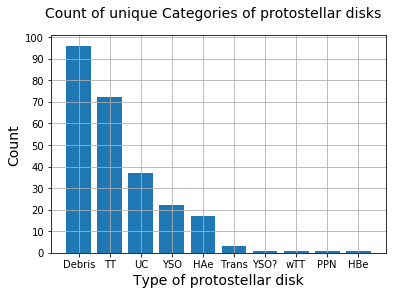

In [6]:
types = ["Debris", "TT", "UC", "YSO", "HAe", "Trans","YSO?", "wTT","PPN", "HBe"]
fig = plt.figure()
plt.bar(types, data['Category'].value_counts())
fig.suptitle('Count of unique Categories of protostellar disks', fontsize=14)
plt.xlabel('Type of protostellar disk', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(np.arange(0, 110, step=10))
plt.grid()
plt.show()

In [7]:
#lets visualize the spectral classes of the catalog!
missing_spectral_class = 0
temp_sense = 2
spectral_bins = [0] * 7
b = [0] * 21
magnitude_spec_type = pd.DataFrame(columns=['Object', 'Spec_Type' ,'Magnitude',]) #empty pandas array

for index, row in data.iterrows():
    spec_type_str = row['Spec_Type']
    r_band_mag_str = row['R_band_mag']
    if (isinstance(spec_type_str, float)):
        print(str(row['Object']) + ": " + str(spec_type_str) + " " + "Spectral Class Data missing")
        missing_spectral_class += 1
    else:
        #show you are pro
        #swtich 1
            #switch 2
        if(spec_type_str[0] == 'O'):
            print(str(row['Object']) + ": " + spec_type_str[0:temp_sense] + ' Type Blue Super Massive proto Star') #Can you print the OBject as well
            spectral_bins[0] += 1
            if(spec_type_str[1] == '1' or spec_type_str[1] == '2' or spec_type_str[1] == '3'):
                b[0] += 1  
            elif(spec_type_str[1] == '4' or spec_type_str[1] == '5' or spec_type_str[1] == '6'):
                b[1] += 1    
            elif(spec_type_str[1] == '7' or spec_type_str[1] == '8' or spec_type_str[1] == '9'):
                b[2] += 1
            if(isinstance(r_band_mag_str, str)):
                print(r_band_mag_str)
                magnitude_spec_type = magnitude_spec_type.append({'Object': str(row['Object']), 'Spec_Type':str(spec_type_str[0:2]) ,'Magnitude': float(r_band_mag_str)}, ignore_index=True)
        elif(spec_type_str[0] == 'B'):
            print(str(row['Object']) + ": " + spec_type_str[0:temp_sense] + ' Type Blue Massive Star') #Can you print the OBject as well
            spectral_bins[1] += 1
            if(spec_type_str[1] == '1' or spec_type_str[1] == '2' or spec_type_str[1] == '3'):
                b[3] += 1  
            elif(spec_type_str[1] == '4' or spec_type_str[1] == '5' or spec_type_str[1] == '6'):
                b[4] += 1    
            elif(spec_type_str[1] == '7' or spec_type_str[1] == '8' or spec_type_str[1] == '9'):
                b[5] += 1
            if(isinstance(r_band_mag_str, str)):
                print(r_band_mag_str)
                magnitude_spec_type = magnitude_spec_type.append({'Object': str(row['Object']), 'Spec_Type':str(spec_type_str[0:2]) ,'Magnitude': float(r_band_mag_str)}, ignore_index=True)
        elif(spec_type_str[0] == 'A'):
            print(str(row['Object']) + ": " + spec_type_str[0:temp_sense] + ' Type Blue Dwarf Star') #Can you print the OBject as well
            spectral_bins[2] += 1
            if(spec_type_str[1] == '1' or spec_type_str[1] == '2' or spec_type_str[1] == '3'):
                b[6] += 1  
            elif(spec_type_str[1] == '4' or spec_type_str[1] == '5' or spec_type_str[1] == '6'):
                b[7] += 1    
            elif(spec_type_str[1] == '7' or spec_type_str[1] == '8' or spec_type_str[1] == '9'):
                b[8] += 1
            if(isinstance(r_band_mag_str, str)):
                print(r_band_mag_str)
                magnitude_spec_type = magnitude_spec_type.append({'Object': str(row['Object']), 'Spec_Type':str(spec_type_str[0:2]) ,'Magnitude': float(r_band_mag_str)}, ignore_index=True)
        elif(spec_type_str[0] == 'F'):
            print(str(row['Object']) + ": " + spec_type_str[0:temp_sense] + ' Type Yellow-white dwarf Star') #Can you print the OBject as well
            spectral_bins[3] += 1
            if(spec_type_str[1] == '1' or spec_type_str[1] == '2' or spec_type_str[1] == '3'):
                b[9] += 1  
            elif(spec_type_str[1] == '4' or spec_type_str[1] == '5' or spec_type_str[1] == '6'):
                b[10] += 1    
            elif(spec_type_str[1] == '7' or spec_type_str[1] == '8' or spec_type_str[1] == '9'):
                b[11] += 1
            if(isinstance(r_band_mag_str, str)):
                print(r_band_mag_str)
                magnitude_spec_type = magnitude_spec_type.append({'Object': str(row['Object']), 'Spec_Type':str(spec_type_str[0:2]) ,'Magnitude': float(r_band_mag_str)}, ignore_index=True)
        elif(spec_type_str[0] == 'G'):
            print(str(row['Object']) + ": " + spec_type_str[0:temp_sense] + ' Type Yellow dwarf Star') #Can you print the OBject as well        
            spectral_bins[4] += 1
            if(spec_type_str[1] == '1' or spec_type_str[1] == '2' or spec_type_str[1] == '3'):
                b[12] += 1  
            elif(spec_type_str[1] == '4' or spec_type_str[1] == '5' or spec_type_str[1] == '6'):
                b[13] += 1    
            elif(spec_type_str[1] == '7' or spec_type_str[1] == '8' or spec_type_str[1] == '9'):
                b[14] += 1
            if(isinstance(r_band_mag_str, str)):
                print(r_band_mag_str)
                magnitude_spec_type = magnitude_spec_type.append({'Object': str(row['Object']), 'Spec_Type':str(spec_type_str[0:2]) ,'Magnitude': float(r_band_mag_str)}, ignore_index=True)
        elif(spec_type_str[0] == 'K'):
            print(str(row['Object']) + ": " + spec_type_str[0:temp_sense] + ' Type Orange dwarf Star') #Can you print the OBject as well        
            spectral_bins[5] += 1
            if(spec_type_str[1] == '1' or spec_type_str[1] == '2' or spec_type_str[1] == '3'):
                b[15] += 1  
            elif(spec_type_str[1] == '4' or spec_type_str[1] == '5' or spec_type_str[1] == '6'):
                b[16] += 1    
            elif(spec_type_str[1] == '7' or spec_type_str[1] == '8' or spec_type_str[1] == '9'):
                b[17] += 1
            if(isinstance(r_band_mag_str, str)):
                print(r_band_mag_str)
                magnitude_spec_type = magnitude_spec_type.append({'Object': str(row['Object']), 'Spec_Type':str(spec_type_str[0:2]) ,'Magnitude': float(r_band_mag_str)}, ignore_index=True)
        elif(spec_type_str[0] == 'M'):
            print(str(row['Object']) + ": " + spec_type_str[0:temp_sense] + ' Type Red Dwarf Star') #Can you print the OBject as well
            spectral_bins[6] += 1
            if(spec_type_str[1] == '1' or spec_type_str[1] == '2' or spec_type_str[1] == '3'):
                b[18] += 1  
            elif(spec_type_str[1] == '4' or spec_type_str[1] == '5' or spec_type_str[1] == '6'):
                b[19] += 1    
            elif(spec_type_str[1] == '7' or spec_type_str[1] == '8' or spec_type_str[1] == '9'):
                b[20] += 1
            if(isinstance(r_band_mag_str, str)):
                print(r_band_mag_str)
                magnitude_spec_type = magnitude_spec_type.append({'Object': str(row['Object']), 'Spec_Type':str(spec_type_str[0:2]) ,'Magnitude': float(r_band_mag_str)}, ignore_index=True)

2MASSI J1628137-243139: nan Spectral Class Data missing
49 Cet: A1 Type Blue Dwarf Star
5.6
61 Vir: G7 Type Yellow dwarf Star
4.2
99 Her: F7 Type Yellow-white dwarf Star
4.7
[MR81] H alpha 17 NE: M2 Type Red Dwarf Star
16.9
AA Tau: M0 Type Red Dwarf Star
11.8
AB Aur: A0 Type Blue Dwarf Star
7.1
alpha CrB: A0 Type Blue Dwarf Star
2.2
AS 205 A: K0 Type Orange dwarf Star
12.8
AS 205 B: K7 Type Orange dwarf Star
14
AS 209: K5 Type Orange dwarf Star
10.4
ASR 41: nan Spectral Class Data missing
AU Mic: M1 Type Red Dwarf Star
8.9
beta Leo: A3 Type Blue Dwarf Star
2
beta Pictoris: A5 Type Blue Dwarf Star
3.9
beta Tri: A5 Type Blue Dwarf Star
2.9
beta UMa: A1 Type Blue Dwarf Star
2.3
BP Psc: nan Spectral Class Data missing
BP Tau: K7 Type Orange dwarf Star
11.1
CAHA J23056+6016: nan Spectral Class Data missing
CB 26: nan Spectral Class Data missing
CI Tau: K7 Type Orange dwarf Star
12.3
CIDA 9: M4 Type Red Dwarf Star
14.5
CoKu Tau 1: M0 Type Red Dwarf Star
16.8
CQ Tau: F2 Type Yellow-white dwar

In [8]:
print(str(missing_spectral_class) + " data are missing spectral classification")
print(" O  B   A   F   G   K   M")
print(spectral_bins)

48 data are missing spectral classification
 O  B   A   F   G   K   M
[0, 9, 54, 33, 18, 45, 46]


In [9]:
spectral_bins

[0, 9, 54, 33, 18, 45, 46]

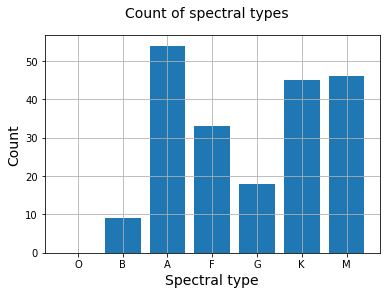

In [10]:
spectral_types = ["O", "B", "A", "F", "G", "K", "M"]
fig = plt.figure()
plt.bar(spectral_types, spectral_bins)
fig.suptitle('Count of spectral types', fontsize=14)
plt.xlabel('Spectral type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(np.arange(0, 60, step=10))
plt.grid()
plt.show()

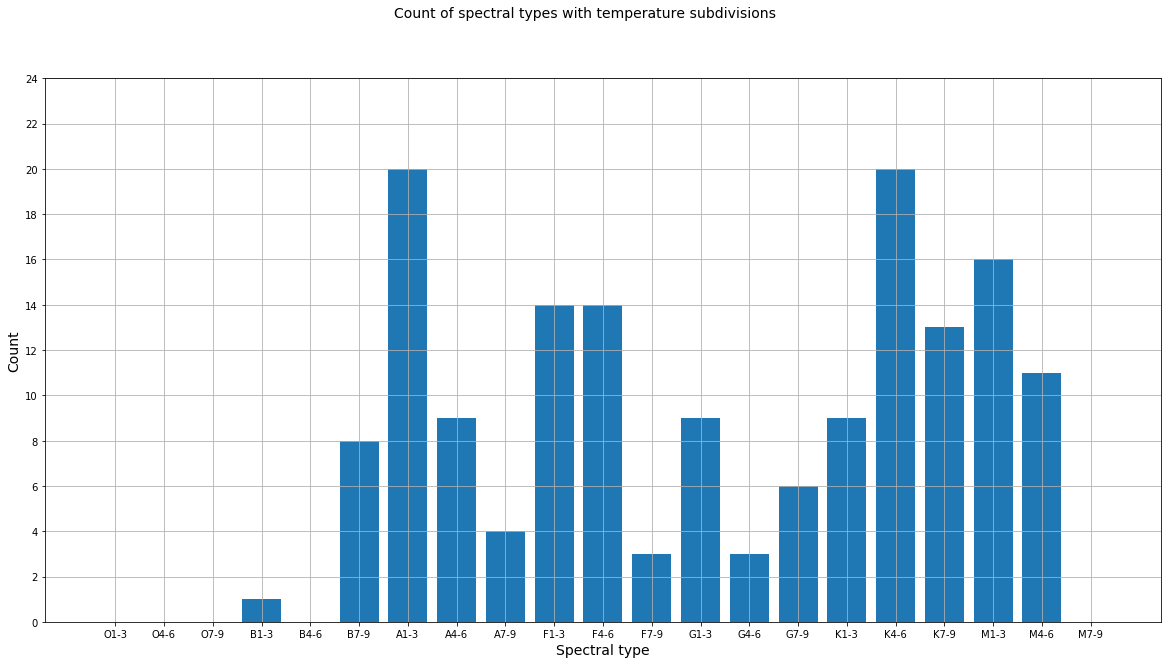

In [11]:
#Subdivisions for Brighter Bins
#a = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
spectral_types_bins = ["O1-3", "O4-6" ,"O7-9", "B1-3", "B4-6" ,"B7-9", 
                       "A1-3", "A4-6" ,"A7-9" , "F1-3", "F4-6" ,"F7-9", 
                       "G1-3", "G4-6" ,"G7-9" , "K1-3", "K4-6" ,"K7-9", 
                       "M1-3", "M4-6" ,"M7-9"]
fig = plt.figure(figsize=(20,10))
plt.bar(spectral_types_bins, b)
fig.suptitle('Count of spectral types with temperature subdivisions', fontsize=14)
plt.xlabel('Spectral type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(np.arange(0, 25, step=2))
plt.grid()
plt.show()

In [12]:
#lets visualize the magnitude of the catalog!
#start by printing column
R_band_magnitude = data[['R_band_mag']]

In [13]:
missing_mag = 0
object_magnitude = pd.DataFrame(columns=['Object', 'Magnitude']) #empty pandas array
for index, row in data.iterrows():
    r_band_mag_str = row['R_band_mag']
    print(type(r_band_mag_str))
    if (isinstance(r_band_mag_str, float)): #the nan got treated as a float
        print(str(row['Object']) + " " + str(r_band_mag_str))
        missing_mag+=1
    else:
        if(r_band_mag_str != '-'):
            print(str(row['Object']) + ": " + str(r_band_mag_str)) #Can you print the OBject as well
            object_magnitude = object_magnitude.append({'Object': str(row['Object']), 'Magnitude': float(r_band_mag_str)}, ignore_index=True)
        else:
            missing_mag+=1
        
print(str(missing_mag) + " Data are missing magnitude")


<class 'str'>
2MASSI J1628137-243139: 17.7
<class 'str'>
49 Cet: 5.6
<class 'str'>
61 Vir: 4.2
<class 'str'>
99 Her: 4.7
<class 'str'>
[MR81] H alpha 17 NE: 16.9
<class 'str'>
AA Tau: 11.8
<class 'str'>
AB Aur: 7.1
<class 'str'>
alpha CrB: 2.2
<class 'str'>
AS 205 A: 12.8
<class 'str'>
AS 205 B: 14
<class 'str'>
AS 209: 10.4
<class 'float'>
ASR 41 nan
<class 'str'>
AU Mic: 8.9
<class 'str'>
beta Leo: 2
<class 'str'>
beta Pictoris: 3.9
<class 'str'>
beta Tri: 2.9
<class 'str'>
beta UMa: 2.3
<class 'str'>
BP Psc: 12.2
<class 'str'>
BP Tau: 11.1
<class 'float'>
CAHA J23056+6016 nan
<class 'float'>
CB 26 nan
<class 'str'>
CI Tau: 12.3
<class 'str'>
CIDA 9: 14.5
<class 'str'>
CoKu Tau 1: 16.8
<class 'str'>
CQ Tau: 8.9
<class 'float'>
CRBR 2422.8-3423 nan
<class 'str'>
CY Tau: 12.5
<class 'str'>
DG Tau: 11.4
<class 'float'>
DG Tau B nan
<class 'str'>
DL Tau: 11.8
<class 'str'>
DM Tau: 12.1
<class 'str'>
DN Tau: 11.5
<class 'str'>
DO Tau: 12.3
<class 'str'>
DoAr 25: 12.7
<class 'str'>
DoAr 28

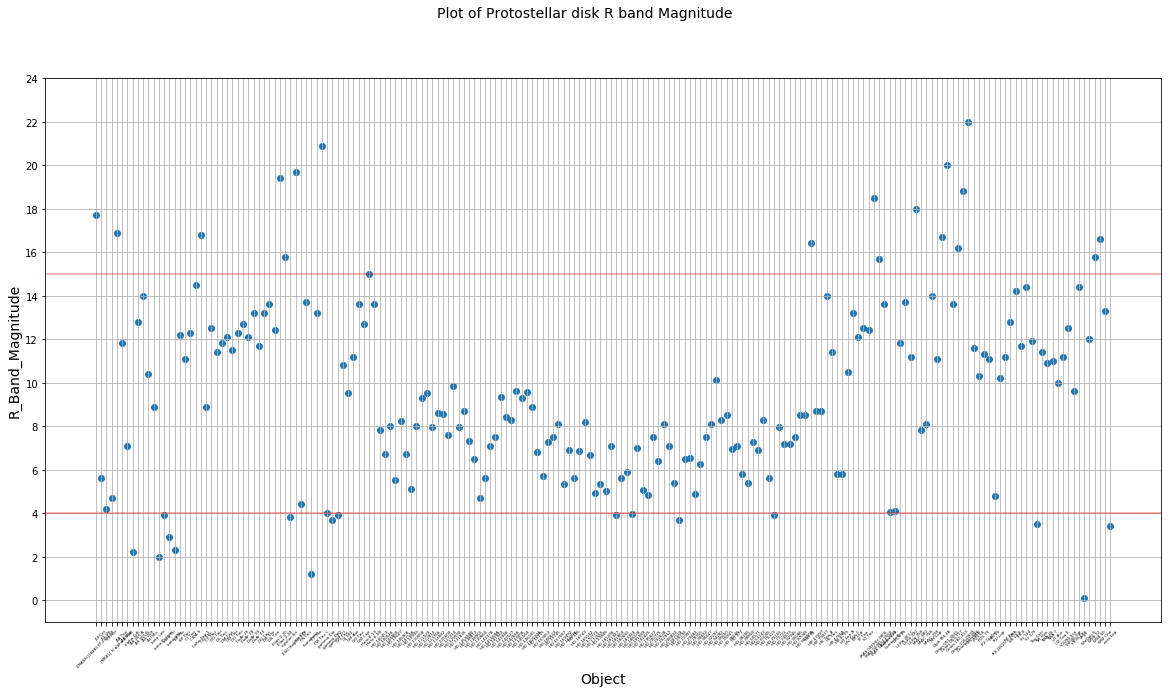

In [14]:
a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter(object_magnitude['Object'], object_magnitude['Magnitude'])
plt.xticks(rotation=45, fontsize=4)
fig.suptitle('Plot of Protostellar disk R band Magnitude', fontsize=14)
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')
plt.xlabel('Object', fontsize=14)
plt.ylabel('R_Band_Magnitude', fontsize=14)
plt.yticks(np.arange(0, 25, step=2))
plt.grid()
plt.show()

In [15]:
#magnitue vs spectral type bins
print("Of items with a spectral type, which ones have magnitude, arrange in sorted ")

magnitude_spec_type_arrange = pd.DataFrame(columns=['Object', 'Spec_Type' ,'Magnitude',]) #empty pandas array

magnitude_spec_type
for types in spectral_types:
    for index, row in magnitude_spec_type.iterrows():
        if(row['Spec_Type'][0] == types):
            magnitude_spec_type_arrange = magnitude_spec_type_arrange.append({'Object': str(row['Object']), 'Spec_Type': str(row['Spec_Type']) ,'Magnitude': float(row['Magnitude'])}, ignore_index=True)

magnitude_spec_type_arrange

Of items with a spectral type, which ones have magnitude, arrange in sorted 


,Object,Spec_Type,Magnitude
0,HD 100546,B9,6.70
1,HD 141569A,B9,7.10
2,HD 181869,B8,3.90
3,HD 182681,B8,5.62
4,HD 200775,B2,7.50
5,HD 36546,B8,6.93
6,V892 Tau,B8,14.40
7,49 Cet,A1,5.60
8,AB Aur,A0,7.10
9,alpha CrB,A0,2.20


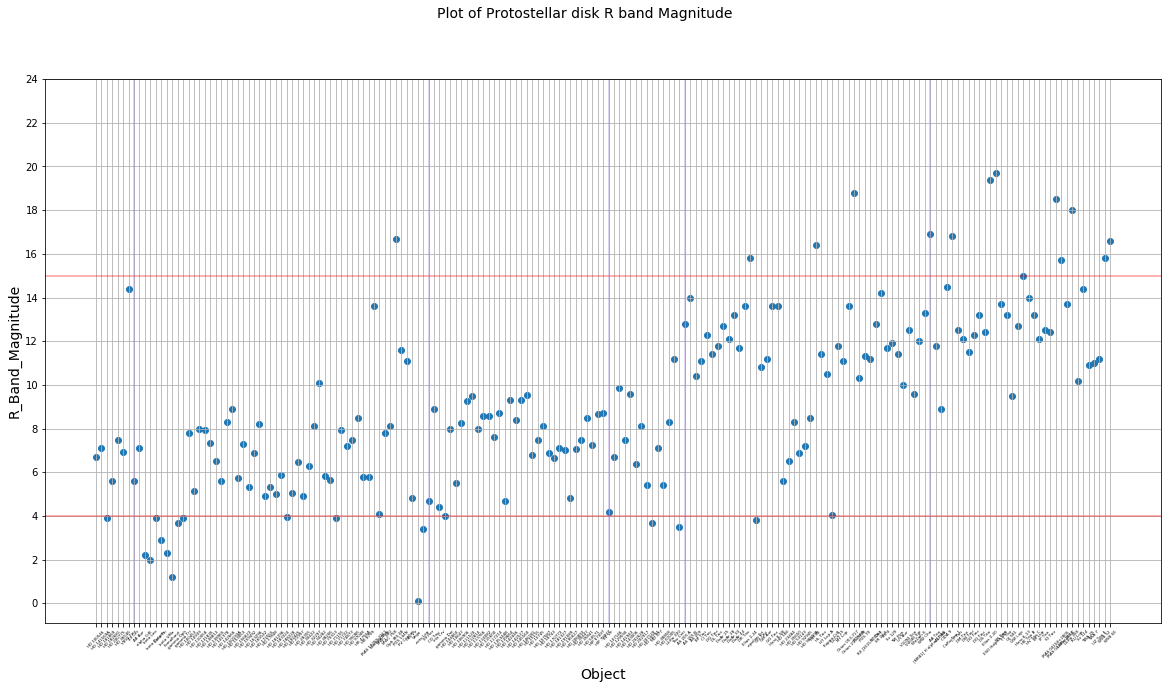

In [16]:
fig = plt.figure(figsize=(20,10))
plt.scatter(magnitude_spec_type_arrange['Object'], magnitude_spec_type_arrange['Magnitude'])
plt.xticks(rotation=45, fontsize=4)
fig.suptitle('Plot of Protostellar disk R band Magnitude', fontsize=14)
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

for i in range(1, len(magnitude_spec_type_arrange)):
    if(magnitude_spec_type_arrange['Spec_Type'][i][0] != magnitude_spec_type_arrange['Spec_Type'][i-1][0]):
        plt.axvline(x=i, alpha= 0.4, color='mediumpurple')

plt.xlabel('Object', fontsize=14)
plt.ylabel('R_Band_Magnitude', fontsize=14)
plt.yticks(np.arange(0, 25, step=2))
plt.grid()
plt.show()

In [17]:
#Already you can deliver some analytics based on this. 
#How many inside the magnitude region of interest are of a certain category of disk
#How many inside the magnitude region of interest are of a certain spectral class.

#now lets do distances

#plot on milky way with galactic coordinates dude

In [18]:
#distances to protostellar disks. Mapped to... milky way galactic?

#lets visualize the magnitude of the catalog!
#start by printing column
distance_pc = data[['Object','Distance_pc']]
print("Known Distances")
distance_pc

Known Distances


,Object,Distance_pc
0,2MASSI J1628137-243139,140.00
1,49 Cet,59.00
2,61 Vir,8.50
3,99 Her,15.60
4,[MR81] H alpha 17 NE,150.00
5,AA Tau,140.00
6,AB Aur,144.00
7,alpha CrB,23.00
8,AS 205 A,128.00
9,AS 205 B,128.00


In [19]:
missing_dist = 0
astrometry = pd.DataFrame(columns=['Object', 
                                   'Distance_pc', 
                                   'Distance_ly', 
                                   'RA_J2000', 
                                   'DEC_J2000', 
                                   'RA_J2000_Deci', 
                                   'DEC_J2000_Deci',
                                   'Galactic longitude', 
                                   'Galactic latitude']) #empty pandas array

for index, row in data.iterrows():
    dist_pc_str = row['Distance_pc']
    if (isinstance(dist_pc_str, float)): #the nan got treated as a float
        print(str(row['Object']) + ": " + str(dist_pc_str) + " parsecs")
        
        #degree minute seconds -> degree decimal
        print("Right Ascension: " + str(row['RA_J2000']) + " In degree minute seconds")
        print("Declination: " + str(row['DEC_J2000']) + " In degree minute seconds")
        print("-")
        
        #practice mirror
        print(str(row['RA_J2000'][0:2]) + str(row['RA_J2000'][3:5]) + str(row['RA_J2000'][6:11]))#be careful here
        print(str(row['DEC_J2000'][1:3]) + str(row['DEC_J2000'][4:6]) + str(row['DEC_J2000'][7:12]))#be careful here
        
        RA_Deci = float(row['RA_J2000'][0:2]) + float(row['RA_J2000'][3:5])/60 + float(row['RA_J2000'][6:11])/3600
        Dec_Deci = float(row['DEC_J2000'][1:3]) + float(row['DEC_J2000'][4:6])/60 + float(row['DEC_J2000'][7:12])/3600
        
        if(row['DEC_J2000'][0] == '-'):
            Dec_Deci *= -1
        
        print("Right Ascension: " + str(RA_Deci) + " In degree decimal")
        print("Declination: " + str(Dec_Deci) + " In degree decimal")
        
        #convert to galactic coordinates
        #declination has a sign
        
        c_icrs = SkyCoord(ra=RA_Deci*u.degree, dec=Dec_Deci*u.degree, frame='icrs')
        print("\nGalactic Coordinates:")
        print(c_icrs.galactic.l)
        print(c_icrs.galactic.b)

        print("\n")
        astrometry = astrometry.append({'Object': str(row['Object']),
                                        'Distance_pc': float(dist_pc_str), 
                                        'Distance_ly': (float(dist_pc_str)*u.parsec).to(u.lightyear), 
                                        'RA_J2000': str(row['RA_J2000']),
                                        'DEC_J2000': str(row['DEC_J2000']), 
                                        'RA_J2000_Deci': float(RA_Deci), 
                                        'DEC_J2000_Deci': float(Dec_Deci),
                                        'Galactic longitude': c_icrs.galactic.l, 
                                        'Galactic latitude': c_icrs.galactic.b}, ignore_index=True)
    else:
        missing_dist+=1
        
print(str(missing_dist) + " Data are missing for astrometry")

2MASSI J1628137-243139: 140.0 parsecs
Right Ascension: 04 16 01.58 In degree minute seconds
Declination: -51 29 11.9 In degree minute seconds
-
041601.58
512911.9
Right Ascension: 4.267105555555555 In degree decimal
Declination: -51.48663888888889 In degree decimal

Galactic Coordinates:
315d32m55.9006s
-64d47m29.1439s


49 Cet: 59.0 parsecs
Right Ascension: 02 17 18.87 In degree minute seconds
Declination: +33 50 49.9 In degree minute seconds
-
021718.87
335049.9
Right Ascension: 2.288575 In degree decimal
Declination: 33.84719444444445 In degree decimal

Galactic Coordinates:
112d58m33.3656s
-28d12m20.8527s


61 Vir: 8.5 parsecs
Right Ascension: 16 19 29.24 In degree minute seconds
Declination: -21 24 13.3 In degree minute seconds
-
161929.24
212413.3
Right Ascension: 16.32478888888889 In degree decimal
Declination: -21.403694444444444 In degree decimal

Galactic Coordinates:
152d33m17.9969s
-83d27m45.5638s


99 Her: 15.6 parsecs
Right Ascension: 05 46 57.34 In degree minute seconds


Galactic Coordinates:
113d42m54.8539s
-36d56m58.8675s


DO Tau: 140.0 parsecs
Right Ascension: 00 06 36.78 In degree minute seconds
Declination: +29 01 17.4 In degree minute seconds
-
000636.78
290117.4
Right Ascension: 0.11021666666666667 In degree decimal
Declination: 29.0215 In degree decimal

Galactic Coordinates:
109d41m58.2676s
-32d32m11.407s


DoAr 25: 138.0 parsecs
Right Ascension: 08 23 48.50 In degree minute seconds
Declination: +53 13 11.0 In degree minute seconds
-
082348.50
531311.0
Right Ascension: 8.396805555555556 In degree decimal
Declination: 53.219722222222224 In degree decimal

Galactic Coordinates:
120d13m26.4867s
-9d33m29.3199s


DoAr 28: 139.0 parsecs
Right Ascension: 04 30 03.99 In degree minute seconds
Declination: +18 13 49.4 In degree minute seconds
-
043003.99
181349.4
Right Ascension: 4.501108333333334 In degree decimal
Declination: 18.230388888888886 In degree decimal

Galactic Coordinates:
111d52m50.317s
-43d55m21.9565s


DoAr 33: 139.0 parsecs
Right Asce

HD 111520: 108.0 parsecs
Right Ascension: 04 17 33.73 In degree minute seconds
Declination: +28 20 47.0 In degree minute seconds
-
041733.73
282047.0
Right Ascension: 4.2927027777777775 In degree decimal
Declination: 28.34638888888889 In degree decimal

Galactic Coordinates:
113d50m30.7371s
-33d55m11.2797s


HD 112810: 143.0 parsecs
Right Ascension: 01 42 29.32 In degree minute seconds
Declination: -53 44 27.0 In degree minute seconds
-
014229.32
534427.0
Right Ascension: 1.7081444444444445 In degree decimal
Declination: -53.740833333333335 In degree decimal

Galactic Coordinates:
317d06m06.3678s
-62d08m35.3717s


HD 113766: 123.0 parsecs
Right Ascension: 05 48 34.94 In degree minute seconds
Declination: -04 05 40.7 In degree minute seconds
-
054834.94
040540.7
Right Ascension: 5.8097055555555555 In degree decimal
Declination: -4.0946388888888885 In degree decimal

Galactic Coordinates:
105d24m49.5904s
-66d00m09.531s


HD 114082: 92.0 parsecs
Right Ascension: 16 15 20.23 In degree minu



HD 163296: 101.0 parsecs
Right Ascension: 23 07 28.71 In degree minute seconds
Declination: +21 08 03.3 In degree minute seconds
-
230728.71
210803.3
Right Ascension: 23.124641666666665 In degree decimal
Declination: 21.134249999999998 In degree decimal

Galactic Coordinates:
135d36m05.4889s
-40d43m30.6429s


HD 166: 13.7 parsecs
Right Ascension: 04 39 17.78 In degree minute seconds
Declination: +22 21 03.5 In degree minute seconds
-
043917.78
222103.5
Right Ascension: 4.654938888888889 In degree decimal
Declination: 22.350972222222225 In degree decimal

Galactic Coordinates:
113d01m36.8307s
-39d53m19.4999s


HD 16743: 58.9 parsecs
Right Ascension: 04 51 47.37 In degree minute seconds
Declination: +30 47 13.9 In degree minute seconds
-
045147.37
304713.9
Right Ascension: 4.863158333333333 In degree decimal
Declination: 30.787194444444445 In degree decimal

Galactic Coordinates:
114d52m03.4737s
-31d34m59.5598s


HD 169142: 117.0 parsecs
Right Ascension: 05 35 16.54 In degree minute se

HD 61005: 34.6 parsecs
Right Ascension: 18 14 10.47 In degree minute seconds
Declination: -32 47 34.5 In degree minute seconds
-
181410.47
324734.5
Right Ascension: 18.23624166666667 In degree decimal
Declination: -32.79291666666666 In degree decimal

Galactic Coordinates:
264d48m47.1031s
-82d40m07.178s


HD 70313: 51.4 parsecs
Right Ascension: 15 15 48.44 In degree minute seconds
Declination: -37 09 16.0 In degree minute seconds
-
151548.44
370916.0
Right Ascension: 15.263455555555556 In degree decimal
Declination: -37.154444444444444 In degree decimal

Galactic Coordinates:
292d04m54.0303s
-79d46m13.4528s


HD 71155: 37.5 parsecs
Right Ascension: 05 35 14.05 In degree minute seconds
Declination: -05 19 52.1 In degree minute seconds
-
053514.05
051952.1
Right Ascension: 5.58723611111111 In degree decimal
Declination: -5.331138888888889 In degree decimal

Galactic Coordinates:
104d00m36.9701s
-67d07m41.2667s


HD 71722: 71.1 parsecs
Right Ascension: 04 18 58.14 In degree minute seconds

305d01m59.366s
-77d18m23.7974s


LkHa 263 C: 275.0 parsecs
Right Ascension: 21 01 36.92 In degree minute seconds
Declination: +68 09 47.8 In degree minute seconds
-
210136.92
680947.8
Right Ascension: 21.026922222222222 In degree decimal
Declination: 68.16327777777778 In degree decimal

Galactic Coordinates:
125d58m29.9603s
5d29m05.1636s


LkHa 330: 250.0 parsecs
Right Ascension: 04 31 50.57 In degree minute seconds
Declination: +24 24 15.0 In degree minute seconds
-
043150.57
242415.0
Right Ascension: 4.530713888888889 In degree decimal
Declination: 24.404166666666665 In degree decimal

Galactic Coordinates:
113d18m57.2969s
-37d50m41.0576s


LkHa 358: 140.0 parsecs
Right Ascension: 13 19 19.54 In degree minute seconds
Declination: -59 28 20.4 In degree minute seconds
-
131919.54
592820.4
Right Ascension: 13.322094444444444 In degree decimal
Declination: -59.47233333333334 In degree decimal

Galactic Coordinates:
302d29m33.7805s
-57d39m15.6276s


M17-SO1: 2200.0 parsecs
Right Ascension

Declination: -54 19 28.5 In degree minute seconds
-
113305.57
541928.5
Right Ascension: 11.551547222222222 In degree decimal
Declination: -54.32458333333334 In degree decimal

Galactic Coordinates:
304d35m59.9987s
-62d47m12.1965s


Orion 183-405: 414.0 parsecs
Right Ascension: 05 24 30.17 In degree minute seconds
Declination: -38 58 10.8 In degree minute seconds
-
052430.17
385810.8
Right Ascension: 5.4083805555555555 In degree decimal
Declination: -38.96966666666667 In degree decimal

Galactic Coordinates:
328d46m17.0303s
-76d37m29.5983s


Orion 183-419: 414.0 parsecs
Right Ascension: 14 44 30.96 In degree minute seconds
Declination: -39 59 20.6 In degree minute seconds
-
144430.96
395920.6
Right Ascension: 14.741933333333332 In degree decimal
Declination: -39.98905555555556 In degree decimal

Galactic Coordinates:
296d29m10.2867s
-77d02m41.3178s


Orion 191-232: 414.0 parsecs
Right Ascension: 04 59 50.74 In degree minute seconds
Declination: +52 04 43.8 In degree minute seconds
-
045

-30d12m19.2207s


TW Hya: 56.0 parsecs
Right Ascension: 05 26 36.59 In degree minute seconds
Declination: -22 29 23.7 In degree minute seconds
-
052636.59
222923.7
Right Ascension: 5.443497222222223 In degree decimal
Declination: -22.489916666666666 In degree decimal

Galactic Coordinates:
65d53m48.4305s
-81d49m41.9501s


TWA 25: 54.0 parsecs
Right Ascension: 02 32 55.81 In degree minute seconds
Declination: +37 20 01.4 In degree minute seconds
-
023255.81
372001.4
Right Ascension: 2.548836111111111 In degree decimal
Declination: 37.33372222222223 In degree decimal

Galactic Coordinates:
113d54m40.631s
-24d48m52.4366s


TWA 7: 34.5 parsecs
Right Ascension: 17 56 21.26 In degree minute seconds
Declination: -21 57 21.6 In degree minute seconds
-
175621.26
215721.6
Right Ascension: 17.939238888888887 In degree decimal
Declination: -21.956 In degree decimal

Galactic Coordinates:
165d47m38.8757s
-83d03m58.1282s


UX Tau A: 140.0 parsecs
Right Ascension: 15 56 41.89 In degree minute seconds

In [20]:
astrometry

,Object,Distance_pc,Distance_ly,RA_J2000,DEC_J2000,RA_J2000_Deci,DEC_J2000_Deci,Galactic longitude,Galactic latitude
0,2MASSI J1628137-243139,140.00,456.61892879986317 lyr,04 16 01.58,-51 29 11.9,4.267106,-51.486639,315d32m55.9006s,-64d47m29.1439s
1,49 Cet,59.00,192.43226285137092 lyr,02 17 18.87,+33 50 49.9,2.288575,33.847194,112d58m33.3656s,-28d12m20.8527s
2,61 Vir,8.50,27.72329210570598 lyr,16 19 29.24,-21 24 13.3,16.324789,-21.403694,152d33m17.9969s,-83d27m45.5638s
3,99 Her,15.60,50.88039492341333 lyr,05 46 57.34,-14 49 19.0,5.782594,-14.821944,93d20m46.8474s,-76d02m26.7064s
4,[MR81] H alpha 17 NE,150.00,489.234566571282 lyr,11 22 05.24,-24 46 39.1,11.368122,-24.777528,92d54m00.0518s,-87d17m37.6088s
5,AA Tau,140.00,456.61892879986317 lyr,16 27 15.72,-24 38 46,16.454367,-24.646111,176d13m22.6296s,-85d55m24.809s
6,AB Aur,144.00,469.6651839084307 lyr,04 46 53.06,+17 00 00.1,4.781406,17.000028,111d56m28.6632s,-45d10m51.7929s
7,alpha CrB,23.00,75.01596687426324 lyr,08 25 39.63,-03 54 23.1,8.427675,-3.906417,111d49m53.5504s,-66d23m43.2781s
8,AS 205 A,128.00,417.48016347416063 lyr,11 10 27.84,-37 31 51.7,11.174400,-37.531028,310d17m04.0216s,-79d30m02.948s
9,AS 205 B,128.00,417.48016347416063 lyr,04 47 06.22,+16 53 23.5,4.785061,16.889861,111d55m06.2556s,-45d17m24.3263s


In [21]:
c = SkyCoord(astrometry['Galactic longitude'], astrometry['Galactic latitude'], frame='galactic')
c

<SkyCoord (Galactic): (l, b) in deg
    [(315.54886127, -64.79142887), (112.97593488, -28.20579243),
     (152.55499913, -83.46265662), ( 93.3463465 , -76.04075178),
     ( 92.90001438, -87.29378021), (176.22295268, -85.92355807),
     (111.94129533, -45.18105359), (111.83154178, -66.39535502),
     (310.28445044, -79.50081888), (111.91840434, -45.29009064),
     (176.02572237, -85.89278481), (303.44871386, -40.53870736),
     (282.77539666, -75.47209901), (103.95672167, -67.19651344),
     (125.90288363,   5.27165348), (172.7904656 , -85.71545403),
     (113.85643787, -33.94750081), (125.93747941, -36.09358327),
     (121.91304099,  -6.47485853), (110.43326745, -49.00907598),
     (291.71052627, -81.24996681), (302.39526812, -71.09331952),
     (301.54173191, -46.87000769), (130.35270665, -66.51971705),
     (116.64895622, -50.56273786), (122.61691243,   3.46675252),
     (296.94144439, -62.40507675), ( 23.44356391, -82.77247319),
     (284.50310786, -82.41757295), (123.95582408, -16.

In [22]:
l_rad = c.l.radian
l_rad[l_rad > np.pi] -= 2. * np.pi
b_rad = c.b.radian

Text(0, 0.5, 'Galactic Latitude')

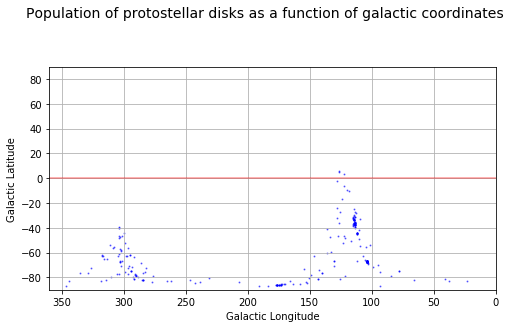

In [23]:
#can we visualize this somehow? #can we gaussian fit to it somehow?

fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1, aspect='equal')
plt.grid()
ax.scatter(c.l, c.b, s=1, color='blue', alpha=0.5)
fig.suptitle('Population of protostellar disks as a function of galactic coordinates', fontsize=14)
plt.axhline(y=0, alpha= 0.4, color='r')
ax.set_xlim(360., 0.)
ax.set_ylim(-90., 90.)
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

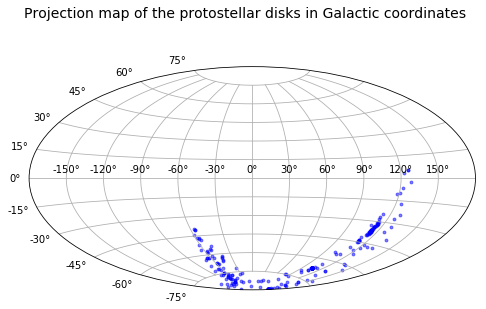

In [24]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Projection map of the protostellar disks in Galactic coordinates', fontsize=14)
ax = fig.add_subplot(1,1,1, projection='aitoff')
ax.scatter(l_rad, b_rad, s=8, color='blue', alpha=0.5)
ax.grid()